 # Telco Customer Churn

### About Dataset
#### Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

#### The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration

To explore this type of models and learn more about the subject.

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

 ## 1. Data upload and first study

In [283]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn

In [284]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Telco_Customer_Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')

In [285]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [286]:
# Check duplicates
df.duplicated().sum()

0

In [287]:
# to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [288]:
# Delete columns "RowNumber", "CustomerId" and "Surname"
df = df.drop(['customerID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [289]:
# Check other duplicate
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['DateCrawled', 'DateCreated', 'LastSeen']]



for col in object_columns:
    print(df[col].value_counts())
    print()

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                 

In [290]:
# Replace No by 0 and Yes by 1

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
print(df['Churn'].head(5))

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_4275/1415225203.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


 ## Analysis of data

In [292]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [293]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

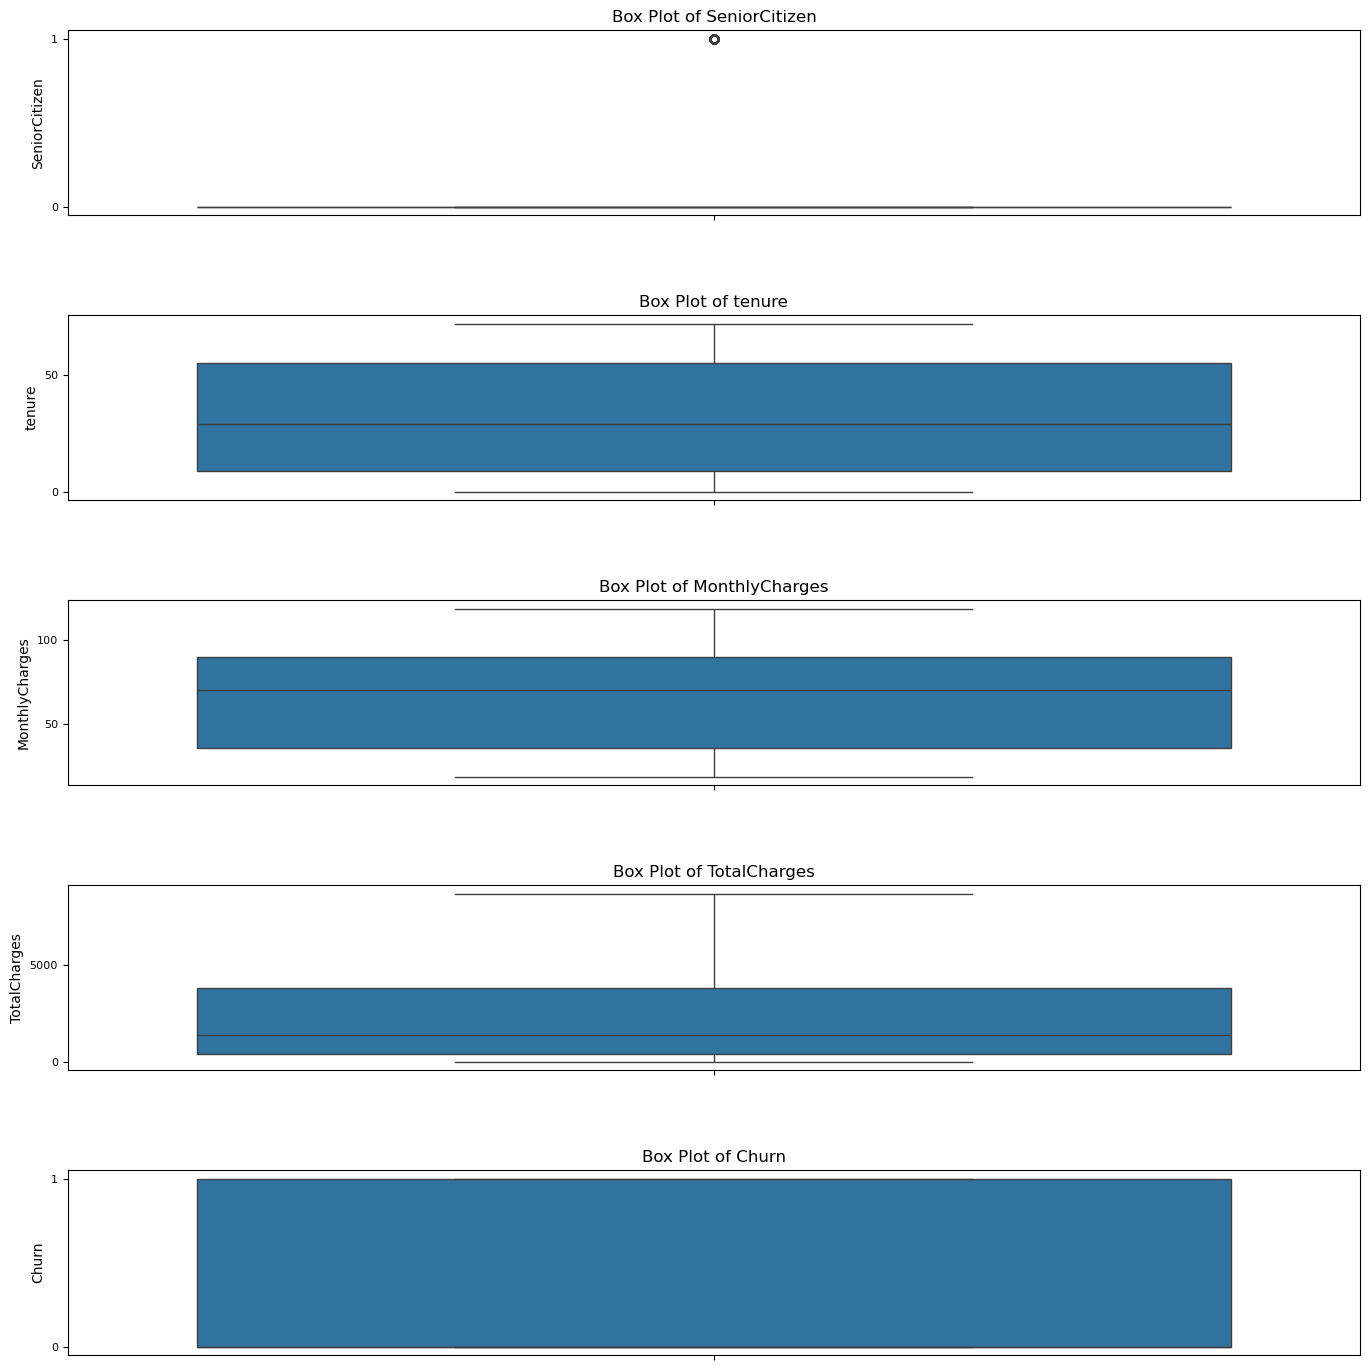

In [295]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_4275/1297827602.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


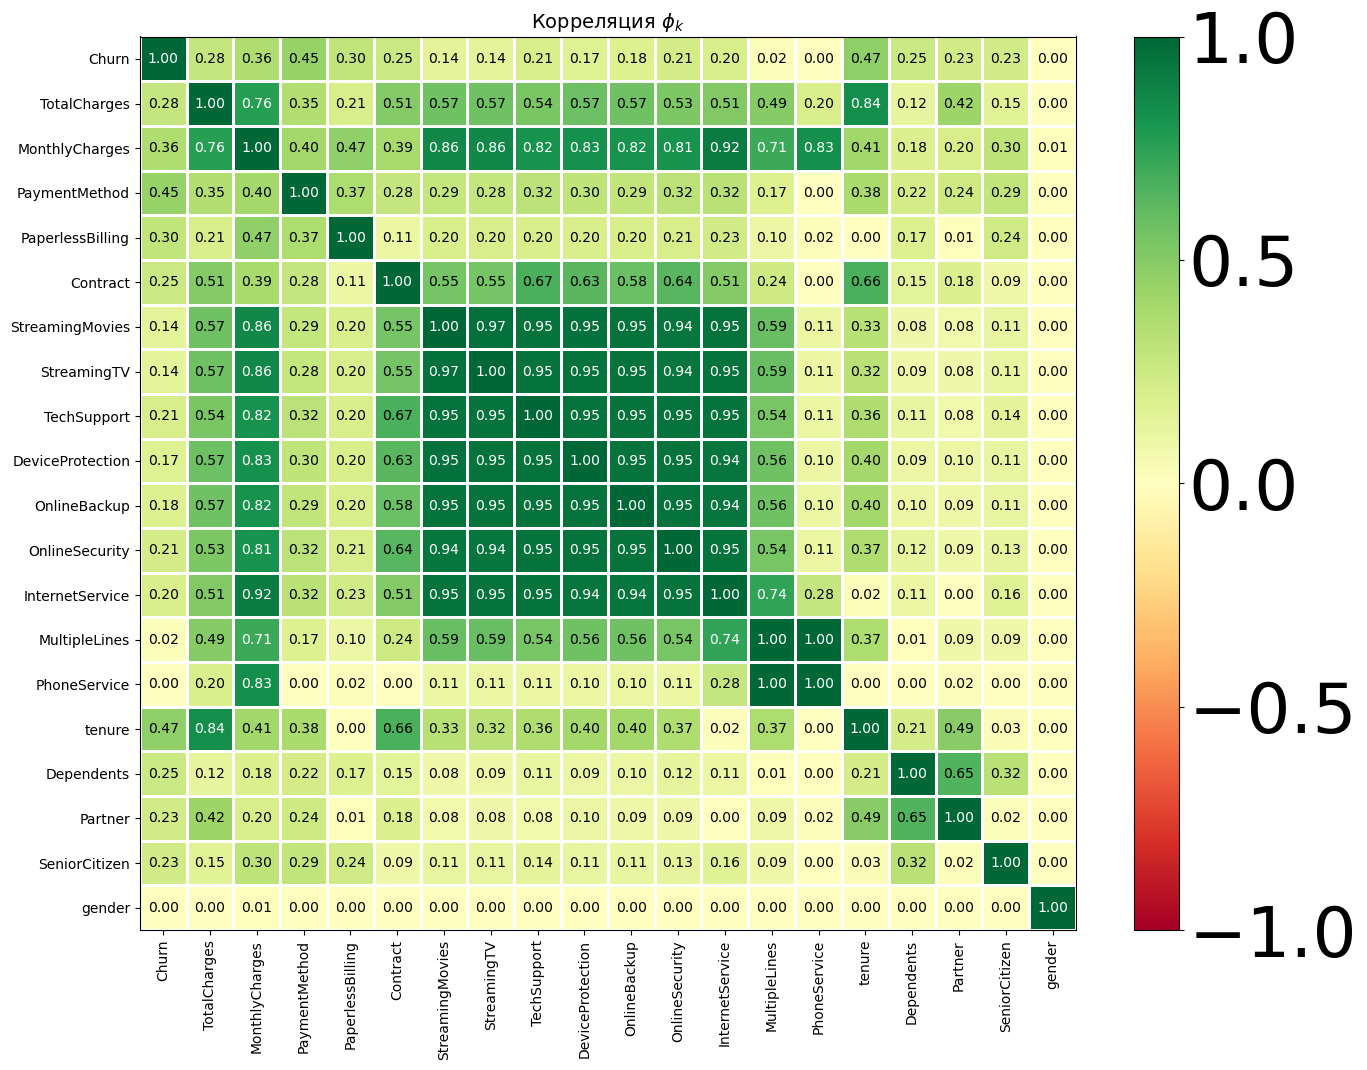

In [297]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)

 ## Data preparation

 ### Prepare numerical and categorial columns

In [300]:
df = pd.get_dummies(df, drop_first=True)

# Select a features and target
features = df.drop(['Churn'], axis=1)
target = df['Churn']

smoten = SMOTEENN(random_state=42)

X, y = smoten.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data Churn
1    2548
0    2122
Name: count, dtype: int64

Test data Churn
1    615
0    553
Name: count, dtype: int64


 #### Write the function for metrics

In [302]:
def metrics(predictions, target):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc = roc_auc_score(target, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model¶

In [304]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            logistic_regres = metrics(predictions, target_test)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 0.9289383561643836, 'precision': 0.9222222222222223, 'recal': 0.9447154471544715, 'f1': 0.9333333333333333, 'roc': 0.9280539261088814}


 #### Train DecisionTree Model

In [306]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions)
    #print(depth, result)
    if best_result < result:
        dec_tree = metrics(predictions, target_test)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=7
Test data {'accuracy': 0.9272260273972602, 'precision': 0.9076923076923077, 'recal': 0.959349593495935, 'f1': 0.932806324110672, 'roc': 0.9254252488275335}


 #### Train Randomforest Model

In [308]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if best_result < result:
            rand_forest = metrics(predictions, target_test)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=1, est=30
Test data {'accuracy': 0.8501712328767124, 'precision': 0.7941176470588235, 'recal': 0.9658536585365853, 'f1': 0.871606749816581, 'roc': 0.8436863229391788}


 #### Train KNeighborsClassifier model

In [310]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

best_result, best_n_neighbors, best_metric = 0, 0, ''
knn = None

# Перебор параметров
for n_neighbors in range(1, 21):  # Перебор от 1 до 20 соседей
    for metric in ['euclidean', 'manhattan', 'minkowski']:  # Разные метрики
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        
        if best_result < result:
            knn = metrics(predictions, target_test)
            best_n_neighbors = n_neighbors
            best_metric = metric
            best_result = result

print(f'The best parameters: n_neighbors={best_n_neighbors}, metric={best_metric}')
print('Test data metrics:', knn)

The best parameters: n_neighbors=7, metric=manhattan
Test data metrics: {'accuracy': 0.910958904109589, 'precision': 0.8676258992805755, 'recal': 0.9804878048780488, 'f1': 0.9206106870229007, 'roc': 0.9070612622943589}


 #### Train XGBlassifier

In [312]:
from xgboost import XGBClassifier

best_result, best_depth, best_est, best_learning_rate = 0, 0, 0, 0

xgb = None
pos_weight = sum(target_train == 0) / sum(target_train == 1)

for est in range(10, 110, 10):
    for depth in range(1, 10):
        for learning_rate in [0.01, 0.1, 0.2]:  
            model = XGBClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                learning_rate=learning_rate,
                scale_pos_weight=pos_weight
            )
            model.fit(features_train, target_train)
            predictions = model.predict(features_test)
            result = recall_score(target_test, predictions)
            
            if best_result < result:
                xgb = metrics(predictions, target_test)
                best_depth = depth
                best_est = est
                best_learning_rate = learning_rate
                best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}, learning_rate={best_learning_rate}')
print('Best F1 Score:', xgb)

The best parameters: depth=9, est=50, learning_rate=0.2
Best F1 Score: {'accuracy': 0.946917808219178, 'precision': 0.9300155520995335, 'recal': 0.9723577235772358, 'f1': 0.9507154213036566, 'roc': 0.9454917008482924}


 #### Train LGBMregressor Model

In [314]:
best_est = 0
best_result = 0
best_depth = 0
lgbm = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = LGBMClassifier(random_state=12345, max_depth=depth, num_leaves=31, n_estimators=est, learning_rate=0.2, boosting_type='gbdt', verbose=-1) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predicted)
        #print(est, depth, result)
        if result > best_result:
            lgbm = metrics(predicted, target_test)
            best_est = est
            best_depth = depth
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', lgbm)

The best parameters: depth=5, est=80
Test data {'accuracy': 0.9452054794520548, 'precision': 0.9258114374034003, 'recal': 0.9739837398373984, 'f1': 0.9492868462757528, 'roc': 0.9435922315823521}


 #### Train Catboost Model

In [316]:
best_est = 0
best_result = 0
best_depth = 0
cat_boost = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = CatBoostClassifier(random_state=12345, max_depth=depth, n_estimators=est, learning_rate=0.2, verbose=0) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
            cat_boost = metrics(predictions, target_test)

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', cat_boost)

The best parameters: depth=1, est=10
Test data {'accuracy': 0.946917808219178, 'precision': 0.9340659340659341, 'recal': 0.967479674796748, 'f1': 0.950479233226837, 'roc': 0.9457651538540702}


 #### Train MLPClassifier Model

In [318]:
best_est = 0
best_result = 0
best_hidden_layer_size = 0
best_learning_rate = 0
mlp_model = None

# Перебор гиперпараметров
for hidden_layer_size in [(10,), (20,), (30,)]:  # Количество нейронов в одном скрытом слое
    for learning_rate in [0.01, 0.1, 0.2]:  # Скорости обучения
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=learning_rate,
                              max_iter=500, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)

        if result > best_result:
            best_result = result
            best_hidden_layer_size = hidden_layer_size
            best_learning_rate = learning_rate
            mlp_model = metrics(predictions, target_test)

print(f'The best parameters: hidden_layer_size={best_hidden_layer_size}, learning_rate={best_learning_rate}')
print('Test data accuracy:', mlp_model)

The best parameters: hidden_layer_size=(10,), learning_rate=0.01
Test data accuracy: {'accuracy': 0.925513698630137, 'precision': 0.9086687306501547, 'recal': 0.9544715447154472, 'f1': 0.9310071371927042, 'roc': 0.9238903835692969}


 #### And now we train a neuron network with Pytorch

In [320]:
# Convert features and target to Tensor 
X_train = torch.from_numpy(features_train).float()
X_test = torch.from_numpy(features_test).float()

y_train = torch.from_numpy(target_train.values).float()
y_test = torch.from_numpy(target_test.values).float()

In [321]:
len(X_train[0])

30

In [322]:
# All functions if activation
activation_functions = [nn.Tanh(), nn.Sigmoid()]

# Set amount of neurons
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 25
n_hidden_neurons_2 = 15
n_hidden_neurons_3 = 5
n_out_neurons = 1

In [323]:
# Write class for our net
class ChurnNet(nn.Module):
    def __init__(
        self, 
        n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2,
        n_hidden_neurons_3,
        n_out_neurons):
            super(ChurnNet, self).__init__()
            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.act1 = nn.ReLU()
            
            self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
            self.act2 = nn.ReLU()

            self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
            self.act3 = nn.ReLU()
            
            self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)        
            self.act4 = nn.Sigmoid()

    def forward(self, x):
       x = self.fc1(x)
       x = self.act1(x)
       x = self.fc2(x)
       x = self.act2(x)
       x = self.fc3(x)
       x = self.act3(x)
       x = self.fc4(x)
       x = self.act4(x)
       return x 

In [324]:
# Initialization of class
net = ChurnNet(n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2,
        n_hidden_neurons_3,
        n_out_neurons)

In [325]:
# Initialization of weght
def init_weights(layer):
    if type(layer) == nn.Linear: 
        nn.init.xavier_normal_(layer.weight)

net.apply(init_weights)

ChurnNet(
  (fc1): Linear(in_features=30, out_features=25, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=25, out_features=15, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=15, out_features=5, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=5, out_features=1, bias=True)
  (act4): Sigmoid()
)

In [326]:
# Optimizer and loss function

torch.manual_seed(42)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

loss = nn.BCELoss()

In [327]:
# Train net
save_dir = '/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Telco_Customer_Churn/'

def train_skynet(num_epochs):
    result = {}

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        preds = net.forward(X_train).flatten()

        loss_value = loss(preds, y_train)
    
        loss_value.backward()

        optimizer.step()

        if epoch % 1000 == 0 or epoch == num_epochs - 1:
            net.eval()
            test_preds = net.forward(X_test).flatten()
            metrics = 100 - (loss_value * 100).item()
            print('Epoch:', epoch)
            print('The accuracy of predictions in the test:', metrics)
            result[epoch] = metrics
    torch.save(net.state_dict(), os.path.join(save_dir, 'model_weights_churn.pth'))
    return result, test_preds

result, predictions = train_skynet(14001)

Epoch: 0
The accuracy of predictions in the test: 30.270706176757812
Epoch: 1000
The accuracy of predictions in the test: 95.79571437835693
Epoch: 2000
The accuracy of predictions in the test: 98.64586913585663
Epoch: 3000
The accuracy of predictions in the test: 99.0267773270607
Epoch: 4000
The accuracy of predictions in the test: 99.24677240848541
Epoch: 5000
The accuracy of predictions in the test: 99.33024442195892
Epoch: 6000
The accuracy of predictions in the test: 99.41495043039322
Epoch: 7000
The accuracy of predictions in the test: 99.43067473173141
Epoch: 8000
The accuracy of predictions in the test: 99.46044671535492
Epoch: 9000
The accuracy of predictions in the test: 99.51590794324875
Epoch: 10000
The accuracy of predictions in the test: 99.53512963652611
Epoch: 11000
The accuracy of predictions in the test: 99.54846566915512
Epoch: 12000
The accuracy of predictions in the test: 99.54948365688324
Epoch: 13000
The accuracy of predictions in the test: 99.55250936746597
Epoch

 #### Change number of neurons for improvement of quality

In [329]:
'''
def neurons_test(n_hidden_neurons_1):
    neurons_test_dict = []

    for i in range(n_hidden_neurons_1, 4, -1):  
        for j in range(i, 2, -1):                
            for k in range(j, 2, -1):            
                net = ChurnNet(X_train.shape[1], i, j, k, 1)  
                
                net.apply(init_weights)

                optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
                loss = nn.MSELoss()

                result, predictions = train_skynet(14001)
                neurons_test_dict.append([X_train.shape[1], i, j, k, min(result, key=result.get), min(result.values())])

                result = {}
                # print(neurons_test_dict)
                
    return neurons_test_dict

'''

'\ndef neurons_test(n_hidden_neurons_1):\n    neurons_test_dict = []\n\n    for i in range(n_hidden_neurons_1, 4, -1):  \n        for j in range(i, 2, -1):                \n            for k in range(j, 2, -1):            \n                net = ChurnNet(X_train.shape[1], i, j, k, 1)  \n                \n                net.apply(init_weights)\n\n                optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)\n                loss = nn.MSELoss()\n\n                result, predictions = train_skynet(14001)\n                neurons_test_dict.append([X_train.shape[1], i, j, k, min(result, key=result.get), min(result.values())])\n\n                result = {}\n                # print(neurons_test_dict)\n                \n    return neurons_test_dict\n\n'

In [330]:
#res = neurons_test(29)

In [331]:
#res_df = pd.DataFrame(res, columns=['Входной слой', 'Слой 1', 'Слой 2', 'Слой 3', 'Выходной слой', 'Эпоха', 'BCE'])

In [332]:
#res_df = res_df.sort_values(by='BCE', ascending=False)
#res_df

In [333]:
# Receive a prediction from trained model
net = ChurnNet(n_in_neurons, 
        n_hidden_neurons_1, 
        n_hidden_neurons_2, 
        n_hidden_neurons_3,
        n_out_neurons)
net.load_state_dict(torch.load('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Telco_Customer_Churn/model_weights_churn.pth'))
net.eval() 
prediction = net.forward(X_test)

/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_4275/3628477999.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('/Users/macbook

In [334]:
# Transformation of probability to a binary predictions
threshold = 0.5
y_pred = [1 if prob >= threshold else 0 for prob in prediction]

# Receive a metrics
neuronet = metrics(y_pred, target_test)
neuronet

{'accuracy': 0.913527397260274,
 'precision': 0.9015625,
 'recal': 0.9382113821138212,
 'f1': 0.9195219123505977,
 'roc': 0.9121436657404549}

 #### Neuronet Keras

In [336]:
# Example Neuronet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Input(shape=[X_train.shape[1]]),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dense(15, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])
optimizer = Adam(learning_rate=0.0413781865162468)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    shuffle = True,
    callbacks=[early_stopping],
    verbose=0
)

In [337]:
import numpy as np

# Предсказания на валидационных данных
y_pred = model.predict(X_test)

# Приведение предсказаний к бинарным значениям (0 или 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Вызов вашей функции metrics
net_keras = metrics(y_pred_binary, y_test)

# Вывод результатов метрик
print(net_keras)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
{'accuracy': 0.9297945205479452, 'precision': 0.92914653784219, 'recal': 0.9382113821138212, 'f1': 0.9336569579288025, 'roc': 0.9293226892485923}


 ### Conclusion

In [339]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest, lgbm, cat_boost, neuronet, xgb, knn, mlp_model, net_keras]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'LGBM', 'CatBoost', 'NeuroNet_Pytorch', 'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier', 'NeuroNet_Keras'])
print(total.sort_values(by='accuracy', ascending=False))

                      accuracy  precision     recal        f1       roc
CatBoost              0.946918   0.934066  0.967480  0.950479  0.945765
XGBClassifier         0.946918   0.930016  0.972358  0.950715  0.945492
LGBM                  0.945205   0.925811  0.973984  0.949287  0.943592
NeuroNet_Keras        0.929795   0.929147  0.938211  0.933657  0.929323
LogisticRegression    0.928938   0.922222  0.944715  0.933333  0.928054
DecisionTree          0.927226   0.907692  0.959350  0.932806  0.925425
MLPClassifier         0.925514   0.908669  0.954472  0.931007  0.923890
NeuroNet_Pytorch      0.913527   0.901563  0.938211  0.919522  0.912144
KNeighborsClassifier  0.910959   0.867626  0.980488  0.920611  0.907061
RandomForest          0.850171   0.794118  0.965854  0.871607  0.843686


In [345]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Определяем диапазоны для гиперпараметров
    iterations = trial.suggest_int('iterations', 1000, 2000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    depth = trial.suggest_int('depth', 4, 12)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True)
    random_strength = trial.suggest_float('random_strength', 1e-5, 10)
    border_count = trial.suggest_int('border_count', 1, 255)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0, 10)

    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_strength=random_strength,
        border_count=border_count,
        bagging_temperature=bagging_temperature,
        verbose=0
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Используйте валидационную выборку
    accuracy = accuracy_score(target_test, y_pred)

    return accuracy

# Создаем объект исследования Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Получаем лучшие параметры
best_params = study.best_params
print(best_params)

[I 2024-12-02 19:13:48,903] A new study created in memory with name: no-name-41496657-2db3-4ace-9c7e-52f7f38f2456
[I 2024-12-02 19:13:59,298] Trial 0 finished with value: 0.9434931506849316 and parameters: {'iterations': 1925, 'learning_rate': 0.01174847677002519, 'depth': 9, 'l2_leaf_reg': 0.004564897786187364, 'random_strength': 7.726369242874748, 'border_count': 67, 'bagging_temperature': 2.6613686060222754}. Best is trial 0 with value: 0.9434931506849316.
[I 2024-12-02 19:14:03,230] Trial 1 finished with value: 0.9477739726027398 and parameters: {'iterations': 1729, 'learning_rate': 0.018183158909727496, 'depth': 7, 'l2_leaf_reg': 0.0011729131558637636, 'random_strength': 4.497958963624153, 'border_count': 165, 'bagging_temperature': 0.39063540711655076}. Best is trial 1 with value: 0.9477739726027398.
[I 2024-12-02 19:14:05,498] Trial 2 finished with value: 0.946917808219178 and parameters: {'iterations': 1030, 'learning_rate': 0.037848251760731935, 'depth': 7, 'l2_leaf_reg': 0.00

{'iterations': 1986, 'learning_rate': 0.07776446391452281, 'depth': 4, 'l2_leaf_reg': 1.586973630599415, 'random_strength': 5.285012862976477, 'border_count': 222, 'bagging_temperature': 5.6120256985177805}


In [352]:
model = CatBoostClassifier(

    iterations=1986,

    learning_rate=0.07776446391452281,

    depth=4,

    l2_leaf_reg=1.586973630599415,

    random_strength=5.285012862976477,

    border_count=222,

    bagging_temperature=5.6120256985177805,
    
    verbose=0

)



model.fit(features_train, target_train)

y_pred = model.predict(features_test)
valid_metrics = metrics(y_pred, target_test)

x_pred = model.predict(features_train)
train_metrics = metrics(x_pred, target_train)

print(f"Train metrics: {train_metrics}")

print(f"Valid metrics: {valid_metrics}")

Train metrics: {'accuracy': 1.0, 'precision': 1.0, 'recal': 1.0, 'f1': 1.0, 'roc': 1.0}
Valid metrics: {'accuracy': 0.9554794520547946, 'precision': 0.9419152276295133, 'recal': 0.975609756097561, 'f1': 0.9584664536741214, 'roc': 0.9543509901645129}


In [ ]:
С использованием smote
                      accuracy  precision     recal        f1       roc
CatBoost              0.850725   0.859733  0.847601  0.853624  0.850811
NeuroNet_Keras        0.841546   0.860648  0.825024  0.842459  0.842005
MLPClassifier         0.833816   0.825339  0.857949  0.841328  0.833145
XGBClassifier         0.832850   0.818667  0.866416  0.841865  0.831917
LogisticRegression    0.831884   0.835681  0.837253  0.836466  0.831735
LGBM                  0.828019   0.814222  0.861712  0.837294  0.827082
NeuroNet_Pytorch      0.818841   0.832046  0.810913  0.821343  0.819061
KNeighborsClassifier  0.813043   0.777049  0.891816  0.830486  0.810853
DecisionTree          0.779227   0.756780  0.840075  0.796255  0.777535
RandomForest          0.752657   0.708870  0.879586  0.785055  0.749128